# Preparing The Environment

In [8]:
from google.colab import drive
drive.mount("/content/drive")

%cd "/content/drive/My Drive"
%ls

%cd "/content/drive/My Drive/ML_Ex2_Team_34/data"
%ls


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive
ML_Ex2_Team_34/  solution/
/content/drive/My Drive/ML_Ex2_Team_34/data
ElectionDataPortugal.csv  parkinsons_updrs.csv


In [1]:
%pip uninstall imgaug && pip uninstall albumentations 
%pip deinstall setuptools && pip install setuptools > 40.4
%pip install -U pip
%pip uninstall setuptools
%pip install 'setuptools<20.2'
%pip install imgaug < 1.7.0 && pip install albumentations < 0.2.7

ERROR: unknown command "deinstall" - maybe you meant "install"
Found existing installation: setuptools 20.1.1
Uninstalling setuptools-20.1.1:
  Would remove:
    /usr/local/bin/easy_install
    /usr/local/bin/easy_install-3.7
    /usr/local/lib/python3.7/dist-packages/_markerlib/*
    /usr/local/lib/python3.7/dist-packages/easy_install.py
    /usr/local/lib/python3.7/dist-packages/pkg_resources/*
    /usr/local/lib/python3.7/dist-packages/setuptools-20.1.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/setuptools/*
Proceed (Y/n)? y
  Successfully uninstalled setuptools-20.1.1
  Using cached setuptools-20.1.1-py2.py3-none-any.whl (472 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 0.18.2 requires setuptools>=40.4, but you have setuptools 20.1.1 which is incompatible.
tensorboard 2.7.0 requires setuptools>=41.0.0, but you have setuptools 20.1.

/bin/bash: 1.7.0: No such file or directory


In [5]:
%pip install auto-sklearn
%pip install deap update_checker tqdm stopit xgboost
%pip install tpot

In [10]:
import autosklearn.regression
import sklearn.metrics
import sklearn.datasets
import sklearn.preprocessing

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

import matplotlib.pyplot as plt
from datetime import datetime


from tpot import TPOTRegressor

import numpy as np
import pandas as pd
import sys
import os
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer, MaxAbsScaler

%matplotlib inline

In [83]:
sys.path.append("..")
from config_ML import PORTUGAL_ELECTION, RANDOM_SEED
#import utils

In [13]:
port_el = pd.read_csv(PORTUGAL_ELECTION, sep=",")

In [14]:
port_el.shape

(21643, 28)

In [15]:
# Explain this in the dataset desciption
port_el = port_el.loc[port_el.territoryName!='Território Nacional'].copy()

In [16]:
port_el.info() #no missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20509 entries, 21 to 21642
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TimeElapsed               20509 non-null  int64  
 1   time                      20509 non-null  object 
 2   territoryName             20509 non-null  object 
 3   totalMandates             20509 non-null  int64  
 4   availableMandates         20509 non-null  int64  
 5   numParishes               20509 non-null  int64  
 6   numParishesApproved       20509 non-null  int64  
 7   blankVotes                20509 non-null  int64  
 8   blankVotesPercentage      20509 non-null  float64
 9   nullVotes                 20509 non-null  int64  
 10  nullVotesPercentage       20509 non-null  float64
 11  votersPercentage          20509 non-null  float64
 12  subscribedVoters          20509 non-null  int64  
 13  totalVoters               20509 non-null  int64  
 14  pre.b

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



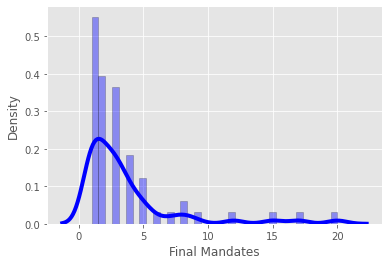

In [17]:
plt.style.use('ggplot')
sns.distplot(port_el.loc[port_el.FinalMandates!=0].FinalMandates, hist=True, kde=True, 
             bins=int(180/5), color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, axlabel="Final Mandates")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



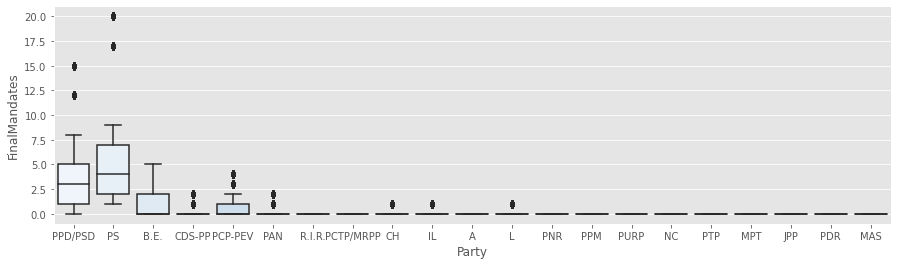

In [18]:
fig, ax = plt.subplots(figsize=(15,4))
sns.boxplot( port_el.Party, port_el.FinalMandates, palette="Blues", orient="v", ax=ax)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



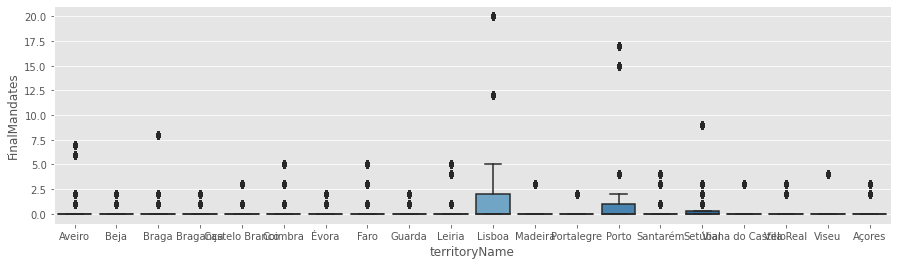

In [19]:
fig, ax = plt.subplots(figsize=(15,4))
sns.boxplot( port_el.territoryName, port_el.FinalMandates, palette="Blues", orient="v", ax=ax)

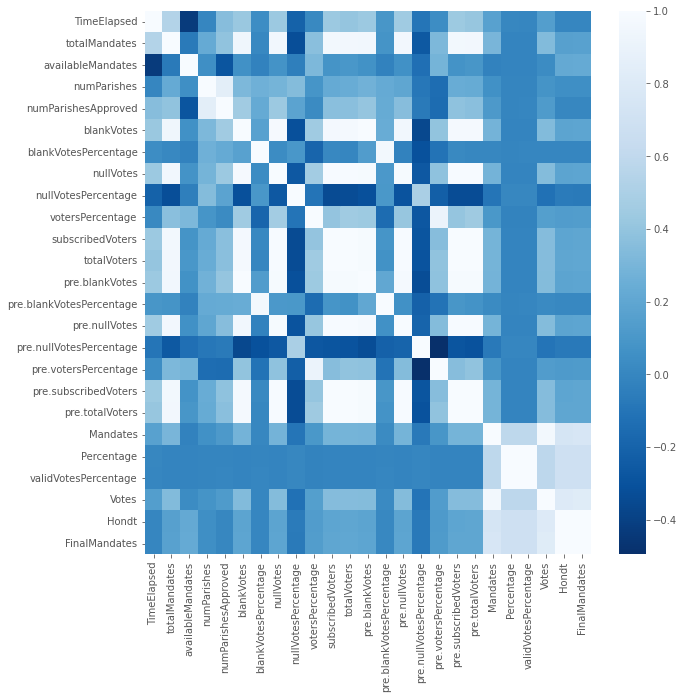

In [20]:
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(port_el.corr(), cmap="Blues_r", ax=ax) # no strong correlation between variables so we can use all variable in the model

In [21]:
port_el.groupby(["territoryName"]).FinalMandates.sum().fillna(0)

territoryName
Aveiro               864
Açores               235
Beja                 162
Braga               1026
Bragança             162
Castelo Branco       216
Coimbra              486
Faro                 486
Guarda               162
Leiria               540
Lisboa              2592
Madeira              324
Portalegre           108
Porto               2160
Santarém             486
Setúbal              972
Viana do Castelo     324
Vila Real            270
Viseu                432
Évora                162
Name: FinalMandates, dtype: int64

In [22]:
port_el.groupby(["Party"]).FinalMandates.sum().fillna(0)

Party
A               0
B.E.         1026
CDS-PP        270
CH             54
IL             54
JPP             0
L              54
MAS             0
MPT             0
NC              0
PAN           216
PCP-PEV       648
PCTP/MRPP       0
PDR             0
PNR             0
PPD/PSD      4144
PPM             0
PS           5703
PTP             0
PURP            0
R.I.R.          0
Name: FinalMandates, dtype: int64

In [23]:
(port_el.FinalMandates==0).sum()

17175

In [24]:
useless_features = [
    'TimeElapsed',
    'time',
]
target = ['FinalMandates']

In [25]:
features = port_el.drop(useless_features, axis=1).columns.tolist()

In [26]:
features

['territoryName',
 'totalMandates',
 'availableMandates',
 'numParishes',
 'numParishesApproved',
 'blankVotes',
 'blankVotesPercentage',
 'nullVotes',
 'nullVotesPercentage',
 'votersPercentage',
 'subscribedVoters',
 'totalVoters',
 'pre.blankVotes',
 'pre.blankVotesPercentage',
 'pre.nullVotes',
 'pre.nullVotesPercentage',
 'pre.votersPercentage',
 'pre.subscribedVoters',
 'pre.totalVoters',
 'Party',
 'Mandates',
 'Percentage',
 'validVotesPercentage',
 'Votes',
 'Hondt',
 'FinalMandates']

In [27]:
df = port_el[features].copy()

In [28]:
df = pd.get_dummies(df)

In [29]:
pd.set_option('display.max_columns', None)
df

,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates,territoryName_Aveiro,territoryName_Açores,territoryName_Beja,territoryName_Braga,territoryName_Bragança,territoryName_Castelo Branco,territoryName_Coimbra,territoryName_Faro,territoryName_Guarda,territoryName_Leiria,territoryName_Lisboa,territoryName_Madeira,territoryName_Portalegre,territoryName_Porto,territoryName_Santarém,territoryName_Setúbal,territoryName_Viana do Castelo,territoryName_Vila Real,territoryName_Viseu,territoryName_Évora,Party_A,Party_B.E.,Party_CDS-PP,Party_CH,Party_IL,Party_JPP,Party_L,Party_MAS,Party_MPT,Party_NC,Party_PAN,Party_PCP-PEV,Party_PCTP/MRPP,Party_PDR,Party_PNR,Party_PPD/PSD,Party_PPM,Party_PS,Party_PTP,Party_PURP,Party_R.I.R.
21,0,16,147,12,186,2.92,101,1.59,53.30,11953,6371,124,1.82,111,1.63,54.56,12511,6826,0,37.75,39.53,2405,7,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
22,0,16,147,12,186,2.92,101,1.59,53.30,11953,6371,124,1.82,111,1.63,54.56,12511,6826,0,34.33,35.95,2187,7,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
23,0,16,147,12,186,2.92,101,1.59,53.30,11953,6371,124,1.82,111,1.63,54.56,12511,6826,0,7.47,7.82,476,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24,0,16,147,12,186,2.92,101,1.59,53.30,11953,6371,124,1.82,111,1.63,54.56,12511,6826,0,6.14,6.43,391,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25,0,16,147,12,186,2.92,101,1.59,53.30,11953,6371,124,1.82,111,1.63,54.56,12511,6826,0,2.39,2.50,152,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,8,0,277,277,4995,2.81,3700,2.08,51.04,348061,177647,4235,2.22,3632,1.90,51.28,371931,190712,0,0.19,0.20,332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
21639,8,0,277,277,4995,2.81,3700,2.08,51.04,348061,177647,4235,2.22,3632,1.90,51.28,371931,190712,0,0.18,0.19,326,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
21640,8,0,277,277,4995,2.81,3700,2.08,51.04,348061,177647,4235,2.22,3632,1.90,51.28,371931,190712,0,0.14,0.15,256,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
21641,8,0,277,277,4995,2.81,3700,2.08,51.04,348061,177647,4235,2.22,3632,1.90,51.28,371931,190712,0,0.13,0.14,239,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [30]:
df.dropna(inplace=True)

In [31]:
groupped = port_el.groupby(["Party", "territoryName"]).FinalMandates.sum().reset_index()

# Shuffule split of data

In [32]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, KFold

In [33]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=RANDOM_SEED)

In [34]:
for train_index, test_index in split.split(df, port_el.dropna().territoryName):
    df_train = df.iloc[train_index, :].copy()
    df_test = df.iloc[test_index, :].copy()

In [35]:
model_features = list(df_train.columns)
model_features.remove("FinalMandates") 

In [36]:
# reduced model features by removing those with 0 importance for the models
model_features = [
    'totalMandates',
    'availableMandates',
    'numParishes',
    'numParishesApproved',
    'blankVotesPercentage',
    'nullVotesPercentage',
    'votersPercentage',
    'pre.nullVotesPercentage',
    'Mandates',
    'validVotesPercentage',
    'territoryName_Aveiro',
    'territoryName_Leiria',
    'territoryName_Lisboa',
    'territoryName_Porto',
    'territoryName_Santarém',
    'territoryName_Setúbal',
    'Party_B.E.',
    'Party_CDS-PP' ,
    'Party_PPD/PSD',
    'Party_PS',
    'Party_CH',
    'Party_IL',
    'Party_L',
    'Party_PAN' ,
    'Party_PCP-PEV'
]

In [51]:
X_train = df_train[model_features]
X_test = df_test[model_features]

y_train = df_train.FinalMandates
y_test = df_test.FinalMandates

X = df[model_features]
Y = df.FinalMandates

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20509 entries, 21 to 21642
Data columns (total 65 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   totalMandates                   20509 non-null  int64  
 1   availableMandates               20509 non-null  int64  
 2   numParishes                     20509 non-null  int64  
 3   numParishesApproved             20509 non-null  int64  
 4   blankVotes                      20509 non-null  int64  
 5   blankVotesPercentage            20509 non-null  float64
 6   nullVotes                       20509 non-null  int64  
 7   nullVotesPercentage             20509 non-null  float64
 8   votersPercentage                20509 non-null  float64
 9   subscribedVoters                20509 non-null  int64  
 10  totalVoters                     20509 non-null  int64  
 11  pre.blankVotes                  20509 non-null  int64  
 12  pre.blankVotesPercentage       

In [53]:
X_train

,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,Mandates,validVotesPercentage,territoryName_Aveiro,territoryName_Leiria,territoryName_Lisboa,territoryName_Porto,territoryName_Santarém,territoryName_Setúbal,Party_B.E.,Party_CDS-PP,Party_PPD/PSD,Party_PS,Party_CH,Party_IL,Party_L,Party_PAN,Party_PCP-PEV
4042,0,4,120,114,2.38,2.69,55.05,2.31,0,0.14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14133,9,0,155,155,3.38,1.87,53.66,1.61,0,0.22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10282,9,0,141,141,2.91,1.94,54.38,1.74,0,0.13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
12677,26,14,243,235,2.30,1.68,58.47,1.48,0,0.17,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
16693,32,8,243,242,2.28,1.63,58.64,1.46,3,10.42,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17181,5,0,197,197,2.25,2.39,45.76,1.78,0,0.73,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10314,6,0,208,208,2.97,1.80,50.60,1.67,0,0.58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3682,0,9,67,45,3.01,1.93,47.06,1.82,0,6.72,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
16182,9,0,67,67,2.84,1.78,45.83,1.62,0,0.80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [66]:
X_train.shape, y_train.shape

((13741, 25), (13741,))

# Creating & Applying the AutoML system on the datasets

In [94]:
class MLAlgorithm:
    def __init__(self, algorithm_dict):
        self.generator = algorithm_dict['algorithm']
        self.hyperparameter_ranges = list(algorithm_dict['hyperparameters'].items())
        self.algorithm_dict = algorithm_dict

        self.indicies = [0]*len(self.hyperparameter_ranges)
        self.hyperparameters = None
        self.algorithm = None

    def fit(self, X, Y):
        self.hyperparameters = {
            param:values[self.indicies[i]]
            for i, (param,values) in enumerate(self.hyperparameter_ranges)
        }

        self.algorithm = self.generator(**self.hyperparameters)
        self.algorithm.fit(X, Y)
    
    def predict(self, X):
        return self.algorithm.predict(X)

    def get_score(self, y_true, y_pred):
        sqrt = np.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
        return sqrt

    def get_neighbours(self):
        neighbours = []
        for i, j in enumerate(self.indicies):
            if j+1 == len(self.hyperparameter_ranges[i][1]):
                continue
            
            neighbour = MLAlgorithm(self.algorithm_dict)
            neighbour.indicies = self.indicies.copy()
            neighbour.indicies[i] = j+1
            neighbours.append(neighbour)

        return neighbours

class AutoML:
    """
        Implements the Auto ML system using a hill climbing algorithm.
    """
    def __init__(self, ml_algorithms, criteria=min):
        self.ml_algorithms = ml_algorithms
        self.criteria = criteria
        self.best_algorithm = None
        self.best_score = float('inf')
        self.best_hyperparameters = None
        self.scores = [float('inf')]*len(ml_algorithms)
    
    def fit(self, X_train, Y_train, X_test, Y_test):
        for i, algorithm in enumerate(self.ml_algorithms):
            algorithm.fit(X_train, Y_train)
            y_pred = algorithm.predict(X_test)
            score = algorithm.get_score(Y_test, y_pred)
            self.scores[i] = score

            if self.criteria(score, self.best_score) == score:
                self.best_score = score
                self.best_algorithm = algorithm

    def single_auto_ml_iteration(self, X_train, Y_train, X_test, Y_test):
        # get the initial scores
        self.fit(X_train, Y_train, X_test, Y_test)

        # create a copy list that will carry the new ml_algorithms
        new_solutions = self.ml_algorithms.copy()
        for i, algorithm in enumerate(self.ml_algorithms):
            # get the neighbours of the current solution (same algorithm, different hyperparameters)
            neighbours = algorithm.get_neighbours()

            # assume the initial algorithm is the best in the beginning
            best_score = self.scores[i]
            best_neighbour = new_solutions[i]

            # compute the score for every neighbour (RMSE)
            for neighbour in neighbours:
                neighbour.fit(X_train, Y_train)
                y_pred = neighbour.predict(X_test)
                score = neighbour.get_score(Y_test, y_pred)

                # keep track of the best neighbour
                if self.criteria(score, best_score) == score:
                    best_score = score
                    best_neighbour = neighbour

            # update the lists            
            self.scores[i] = best_score
            new_solutions[i] = best_neighbour

            if self.criteria(self.scores[i], self.best_score) == self.scores[i]:
                self.best_algorithm = best_neighbour
                self.best_score = self.scores[i]
                self.best_hyperparameters = best_neighbour.hyperparameters

        self.ml_algorithms = new_solutions
        
    def get_best_algorithm(self, iterations, X_train, Y_train, X_test, Y_test):
        for _ in range(iterations):
            self.single_auto_ml_iteration(X_train, Y_train, X_test, Y_test)
        
        return {'algorithm': self.best_algorithm,
                'score': self.best_score,
                'hyperparameters': self.best_hyperparameters}
    
    def print_summary(self):
        for i, algorithm in enumerate(self.ml_algorithms):
            print(f"{algorithm.algorithm}: score='{self.scores[i]}', hyperparameters='{algorithm.hyperparameters}'")

In [97]:
algorithm1 = {
        'algorithm': RandomForestRegressor,
        'hyperparameters': {
            'n_estimators': [100, 150, 200, 300],
            'max_depth': np.arange(3, 15),
        }
    }

algorithm2 = {
        'algorithm': DecisionTreeRegressor,
        'hyperparameters': {
            'max_depth': np.arange(3, 15),
        }
    }

algorithm3 = {
        'algorithm': LinearRegression,
        'hyperparameters': {
            'normalize': [False, True],
            'fit_intercept': [True, False],
        }
    }

algorithms = [algorithm1, algorithm2, algorithm3]
algorithms = [MLAlgorithm(algo) for algo in algorithms]

automl_system = AutoML(algorithms)


print(f"Testing my system against dataset Portugal Election 2019")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

iterations = 5
best_algorithm = automl_system.get_best_algorithm(iterations, 
                                                    X_train, 
                                                    y_train, 
                                                    X_test, 
                                                    y_test)
    
print("System summary:-")
automl_system.print_summary()

print(f"The best algorithm for dataset Portugal Election 2019:", end=" ")
print(best_algorithm['algorithm'].algorithm)

print("The best hyperparameters for this algorithm:", end=" ")
print(best_algorithm['hyperparameters'])

print("The RMSE score of this algorithm:", end=" ")
print(best_algorithm['score'])

train_predictions = best_algorithm['algorithm'].predict(X_train)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))

test_predictions = best_algorithm['algorithm'].predict(X_test)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))
print("-"*40)

Testing my system against dataset Portugal Election 2019
X_train shape: (13741, 25)
y_train shape: (13741,)
X_test shape: (6768, 25)
y_test shape: (6768,)
System summary:-
RandomForestRegressor(max_depth=8): score='0.08960995865717211', hyperparameters='{'n_estimators': 100, 'max_depth': 8}'
DecisionTreeRegressor(max_depth=8): score='0.11397471500111134', hyperparameters='{'max_depth': 8}'
LinearRegression(normalize=True): score='1.0741204122522858', hyperparameters='{'normalize': True, 'fit_intercept': True}'
The best algorithm for dataset Portugal Election 2019: RandomForestRegressor(max_depth=8)
The best hyperparameters for this algorithm: {'n_estimators': 100, 'max_depth': 8}
The RMSE score of this algorithm: 0.08960995865717211
Train R2 score: 0.9986884721824043
Test R2 score: 0.9980190827240208
----------------------------------------


# Comparing my system to sklearn-automl system

In [80]:
print(f"Testing auto-sklearn system against dataset Portugal Election 2019")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
print()

automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=180,
    per_run_time_limit=40,
    tmp_folder='telmp',
    )

automl.fit(X_train, y_train)

print("Leaderboard:")
print(automl.leaderboard())

train_predictions = automl.predict(X_train)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))

test_predictions = automl.predict(X_test)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))

Testing auto-sklearn system against dataset Portugal Election 2019
X_train shape: (13741, 25)
y_train shape: (13741,)
X_test shape: (6768, 25)
y_test shape: (6768,)

Leaderboard:
          rank  ensemble_weight           type      cost   duration
model_id                                                           
2            1             0.94  random_forest  0.000497  11.979256
5            2             0.06            mlp  0.004921  18.203805
Train R2 score: 0.9997278236977142
Test R2 score: 0.99923992230523


# Comparing my system to TPOT auto ml system

In [82]:
# I've lowered the population size and the generation size to make 
# the notebook run in a resonable time
# increasing the numbers would yield a far better accuracy for sure

print(f"Testing TPOT system against dataset Portugal Election 2019")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
print()
tpot = TPOTRegressor(generations=2, 
                     population_size=5, 
                     verbosity=2, 
                     random_state=42)
tpot.fit(X_train, y_train)

print("MSE:",tpot.score(X_test, y_test))
print("RMSE:",np.sqrt(tpot.score(X_test, y_test)))

train_predictions = tpot.predict(X_train)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))

test_predictions = tpot.predict(X_test)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))

Testing TPOT system against dataset Portugal Election 2019
X_train shape: (13741, 25)
y_train shape: (13741,)
X_test shape: (6768, 25)
y_test shape: (6768,)



Optimization Progress:   0%|          | 0/15 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.0058059035751146446

Generation 2 - Current best internal CV score: -0.005085498676457312

Best pipeline: RandomForestRegressor(XGBRegressor(MaxAbsScaler(input_matrix), learning_rate=0.1, max_depth=8, min_child_weight=9, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.15000000000000002, verbosity=0), bootstrap=True, max_features=0.4, min_samples_leaf=5, min_samples_split=5, n_estimators=100)
MSE: -0.0029124084747995937
RMSE: nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning:

invalid value encountered in sqrt



Train R2 score: 0.9997378864467711
Test R2 score: 0.9992815342465265
